## Energy potential-dependence wavelength shifts

In [1]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")

#List of Nave with the potentials values
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Characterization\Third signature\Data\Nave Fe I list potential.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

In [3]:
# Take the energy potential values from the nave list
#Convert the wavelength in A cause its in cm^-1 
raw_lambda['Wave A'] = round((10**8)/raw_lambda['Wave (cm)'],4)
raw_lambda = raw_lambda.sort_values('Wave A', ascending=True, na_position='first')
raw_lambda = raw_lambda[raw_lambda['Wave A'].between(4000,23000,inclusive='right')] #Separate the range for use
raw_lambda = raw_lambda[raw_lambda['Quality']=='A'].drop(['Wave (cm)'],axis=1).reset_index(drop=True)
raw_lambda

,Quality,Lower potential level,Higher potential level,Wave A
0,A,2.990,6.089,4001.5883
1,A,2.176,5.273,4002.7931
2,A,3.237,6.331,4005.9597
3,A,3.017,6.112,4006.1108
4,A,1.557,4.652,4006.3743
...,...,...,...,...
3280,A,5.099,5.642,22838.5953
3281,A,5.828,6.370,22852.1702
3282,A,5.839,6.380,22888.7529
3283,A,5.334,5.874,22962.2707


In [4]:
# Take the energy excitation values for the lines from all ranges
Lower_potential = []
Higher_potential = []

for i in range(len(NIR_data)):
    data = raw_lambda[raw_lambda['Wave A'] == NIR_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_NIR = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : NIR_data['Velocity'],
                                'Wave A': NIR_data['Observed wavelength'],
                                'Line Depth': NIR_data['Line Depth']})

Energy_data_NIR

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-172,8001.1581,0.581650
1,2.176,5.273,-290,8030.5316,0.420685
2,3.237,6.331,-160,8048.2733,0.559357
3,3.017,6.112,-574,8074.3861,0.085453
4,1.557,4.652,-429,8077.3770,0.254856
...,...,...,...,...,...
222,1.485,4.312,-499,17165.8042,0.248327
223,3.071,5.896,-549,17209.0074,0.273511
224,3.602,6.427,-539,17307.0500,0.299686
225,3.018,5.840,-598,17315.5846,0.071818


In [5]:
# Take the energy excitation values for the lines
Lower_potential = []
Higher_potential = []

for i in range(len(SPA_data)):
    data = raw_lambda[raw_lambda['Wave A'] == SPA_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_SPA = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : SPA_data['Velocity'],
                                'Wave A': SPA_data['Observed wavelength'],
                                'Line Depth': SPA_data['Line Depth']})

Energy_data_SPA

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-212,4202.1137,0.879739
1,2.176,5.273,-483,4203.9391,0.748713
2,3.237,6.331,-355,4206.7272,0.830354
3,3.017,6.112,-298,4208.3170,0.888042
4,1.557,4.652,-156,4209.7963,0.875357
...,...,...,...,...,...
473,3.694,6.134,-322,7915.0519,0.399878
474,3.267,5.706,-316,7943.2820,0.353090
475,0.958,3.396,-37,7948.0484,0.646317
476,4.256,6.691,-347,7957.1302,0.070795


In [6]:
# Take the energy excitation values for the lines
Lower_potential = []
Higher_potential = []

for i in range(len(VIS_data)):
    data = raw_lambda[raw_lambda['Wave A'] == VIS_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_VIS = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : VIS_data['Velocity'],
                                'Wave A': VIS_data['Observed wavelength'],
                                'Line Depth': VIS_data['Line Depth']})

Energy_data_VIS

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-469,4203.9393,0.638575
1,2.176,5.273,-391,4206.7267,0.740583
2,3.237,6.331,-305,4208.3169,0.785466
3,3.017,6.112,-284,4209.7945,0.789629
4,1.557,4.652,-263,4214.8395,0.802715
...,...,...,...,...,...
480,3.984,6.415,-131,7939.3372,0.587679
481,0.990,3.417,-391,7943.2800,0.295492
482,1.557,3.984,-131,7948.0459,0.580112
483,4.301,6.727,-366,7957.1297,0.054256


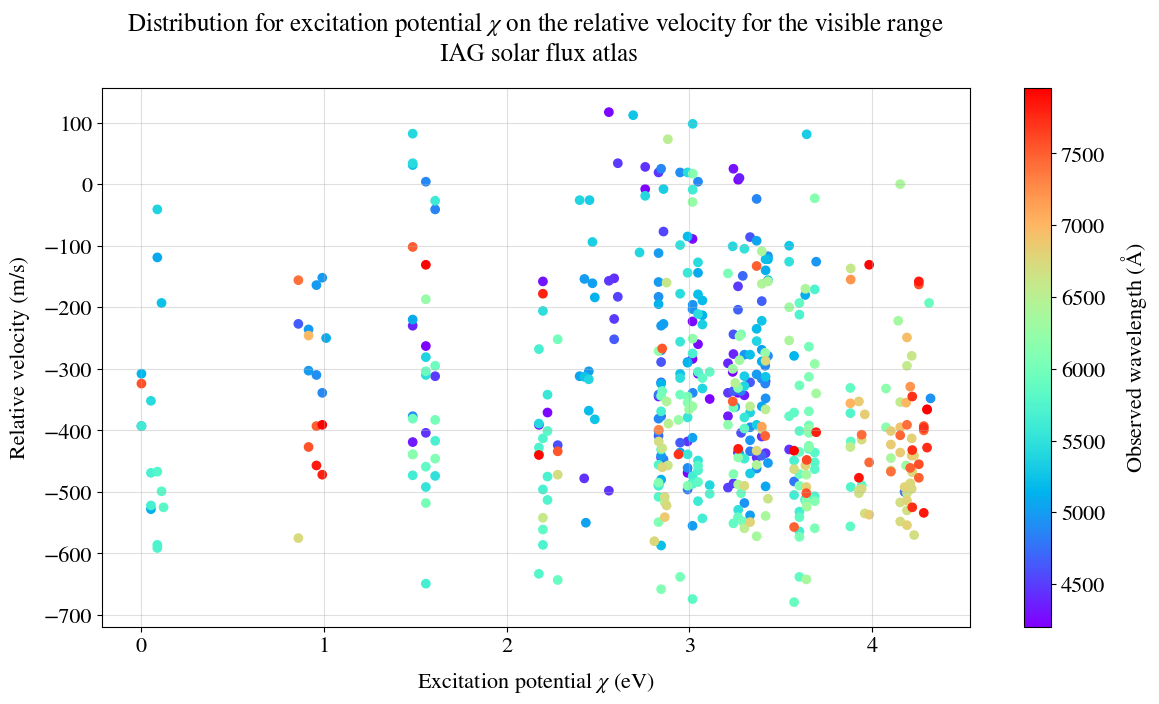

In [7]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(Energy_data_VIS['Lower potential'],Energy_data_VIS['Velocity'],c=Energy_data_VIS['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Distribution for excitation potential $\chi$ on the relative velocity for the visible range \n IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Velocity lower potential_VIS')

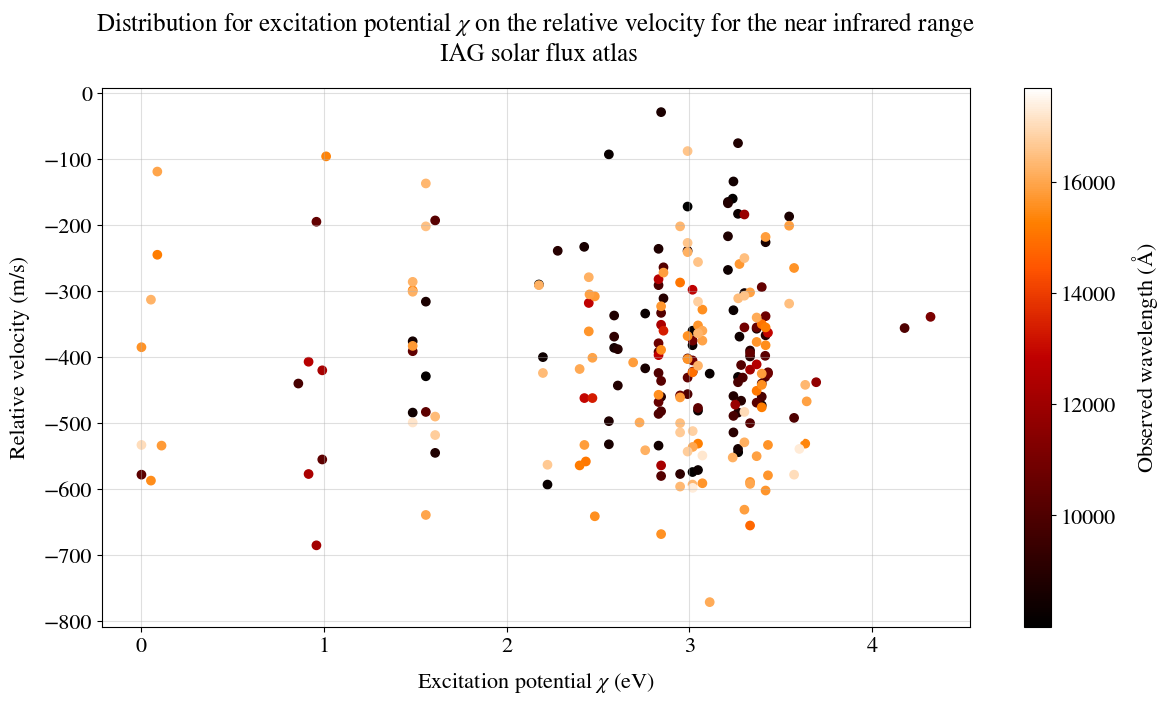

In [8]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(Energy_data_NIR['Lower potential'],Energy_data_NIR['Velocity'],c=Energy_data_NIR['Wave A'],cmap='gist_heat',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Distribution for excitation potential $\chi$ on the relative velocity for the near infrared range \n IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Velocity lower potential_NIR')

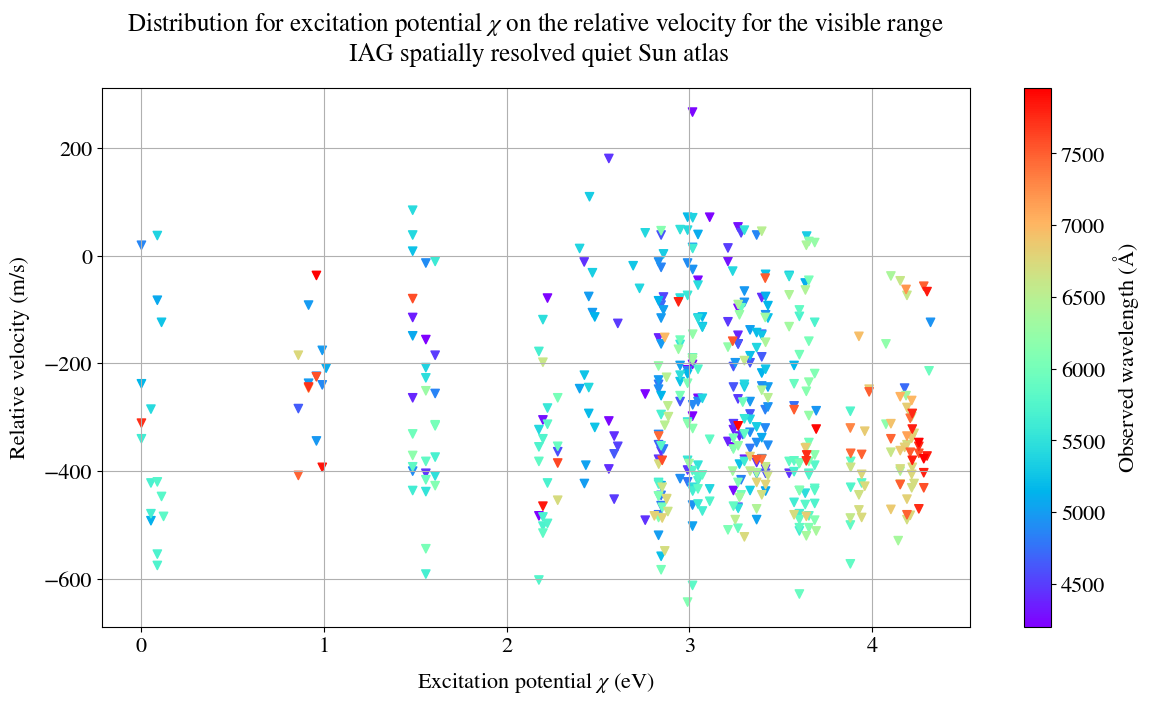

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(Energy_data_SPA['Lower potential'],Energy_data_SPA['Velocity'],c=Energy_data_SPA['Wave A'],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$')

ax.set_title('Distribution for excitation potential $\chi$ on the relative velocity for the visible range \n IAG spatially resolved quiet Sun atlas', pad=20)
ax.set_xlabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid()

# fig2.savefig('Velocity lower potential_SPA')

### Fixing velocity

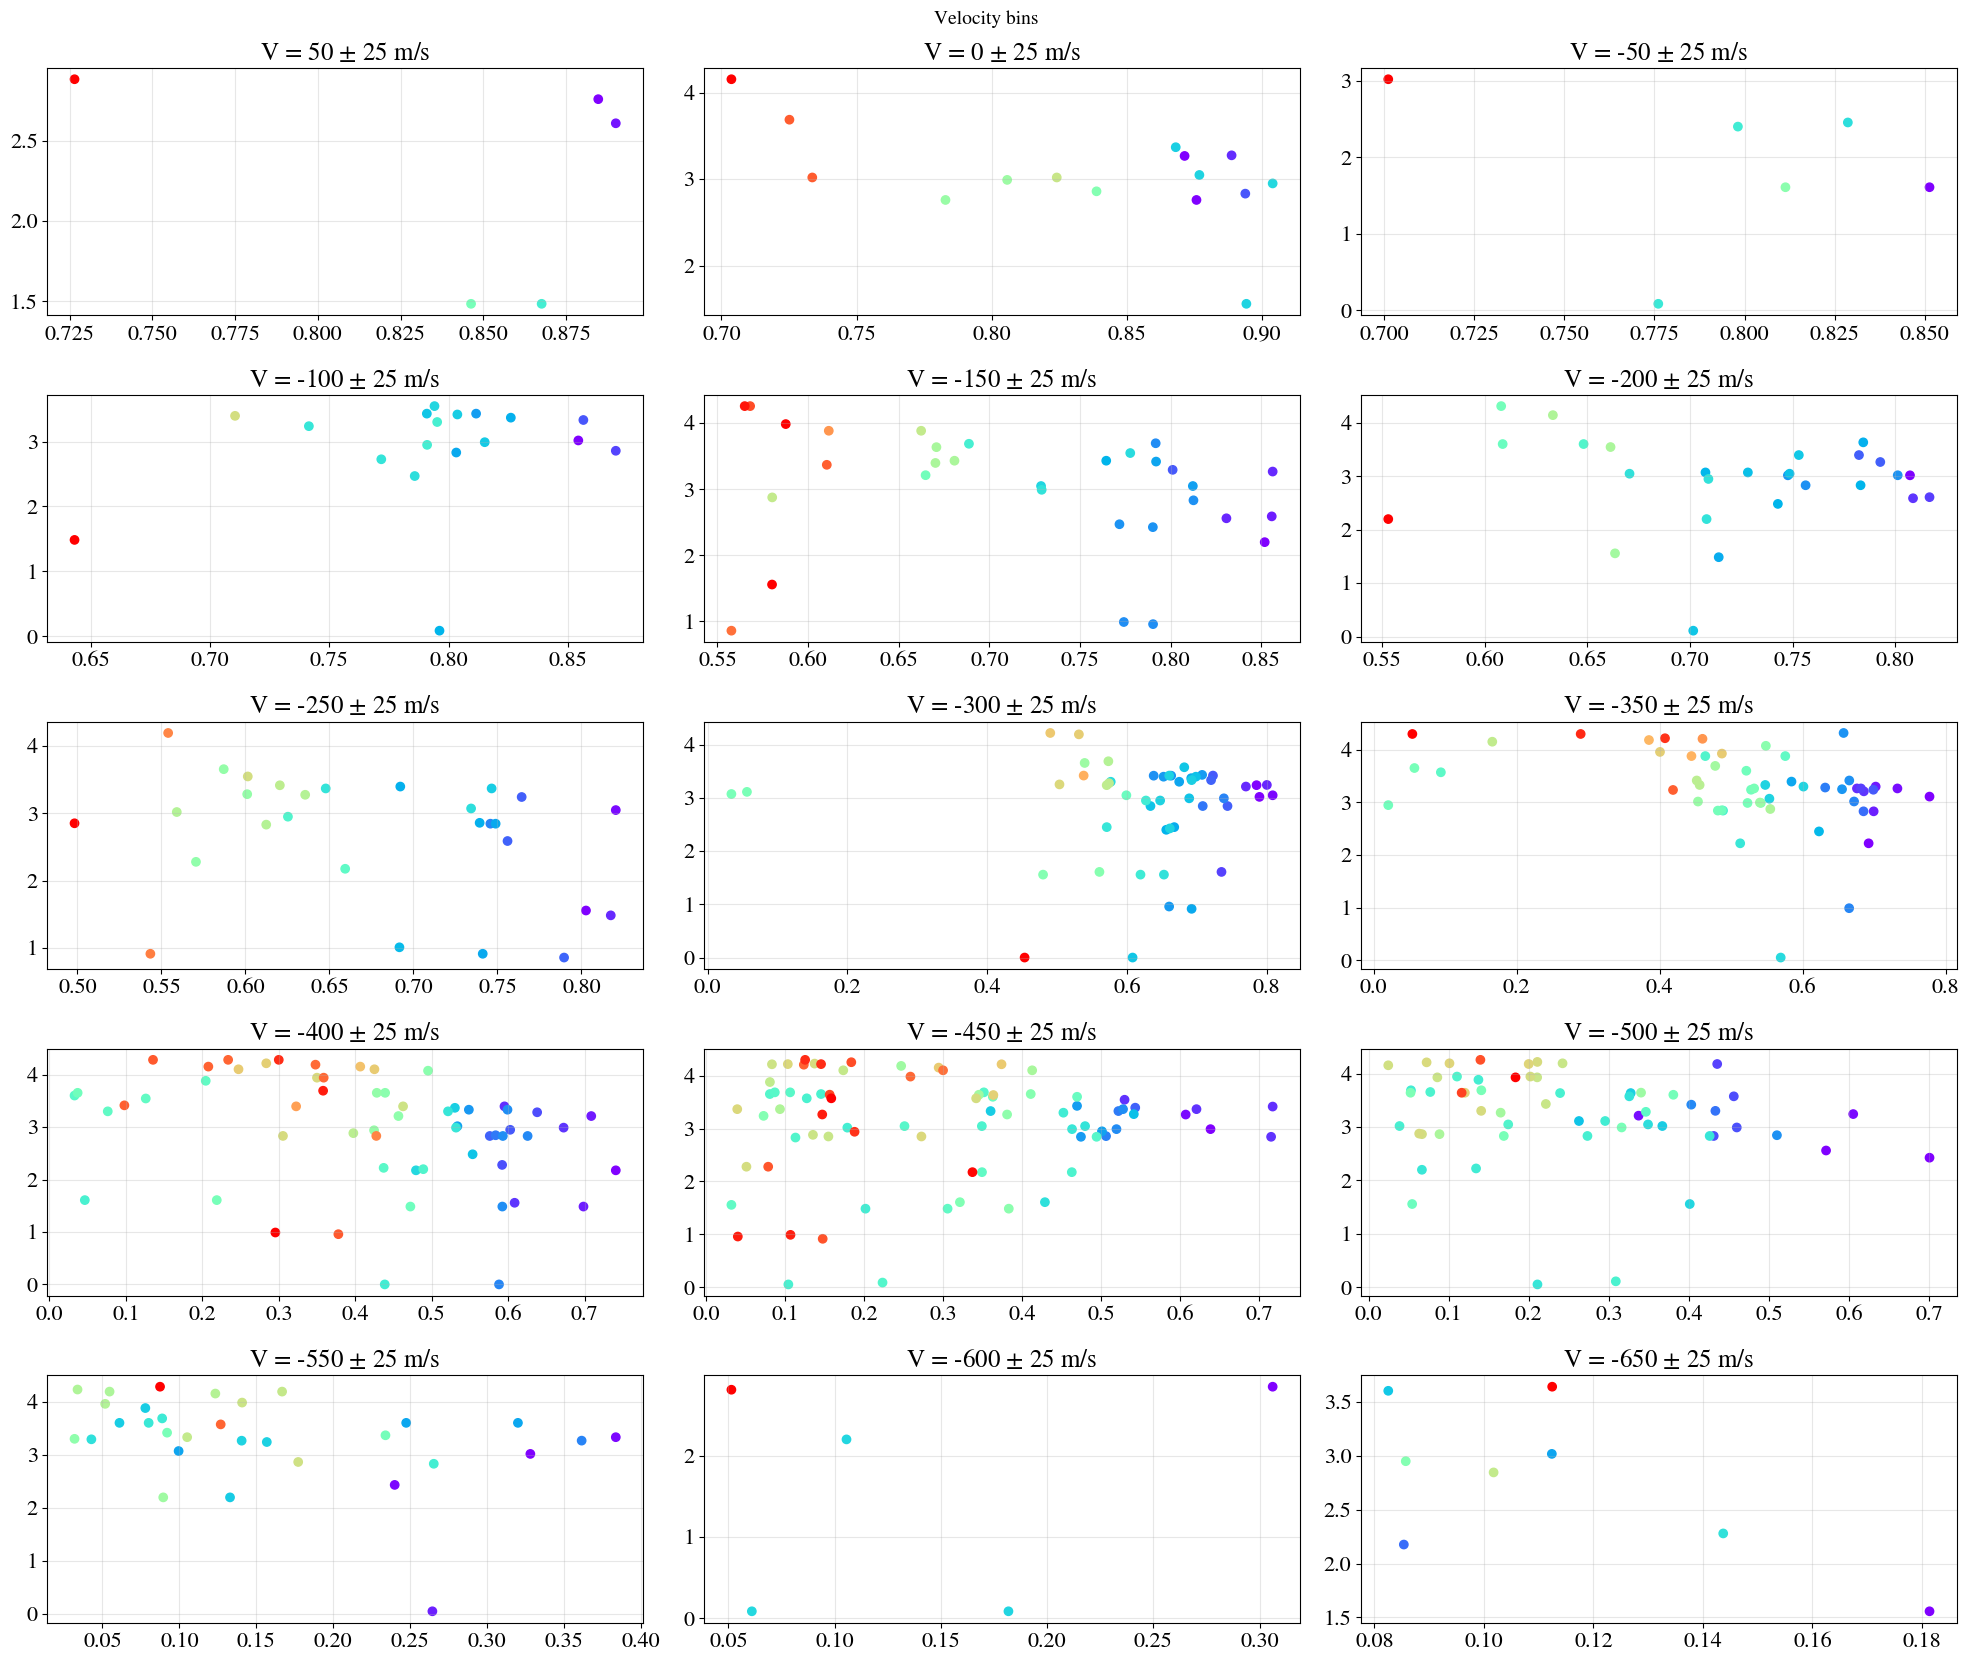

In [10]:
#Organize the dataframe wtih ascending velocities
listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(Energy_data_VIS[Energy_data_VIS['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Line Depth'],velocity_VIS[i]['Lower potential'],c=velocity_VIS[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

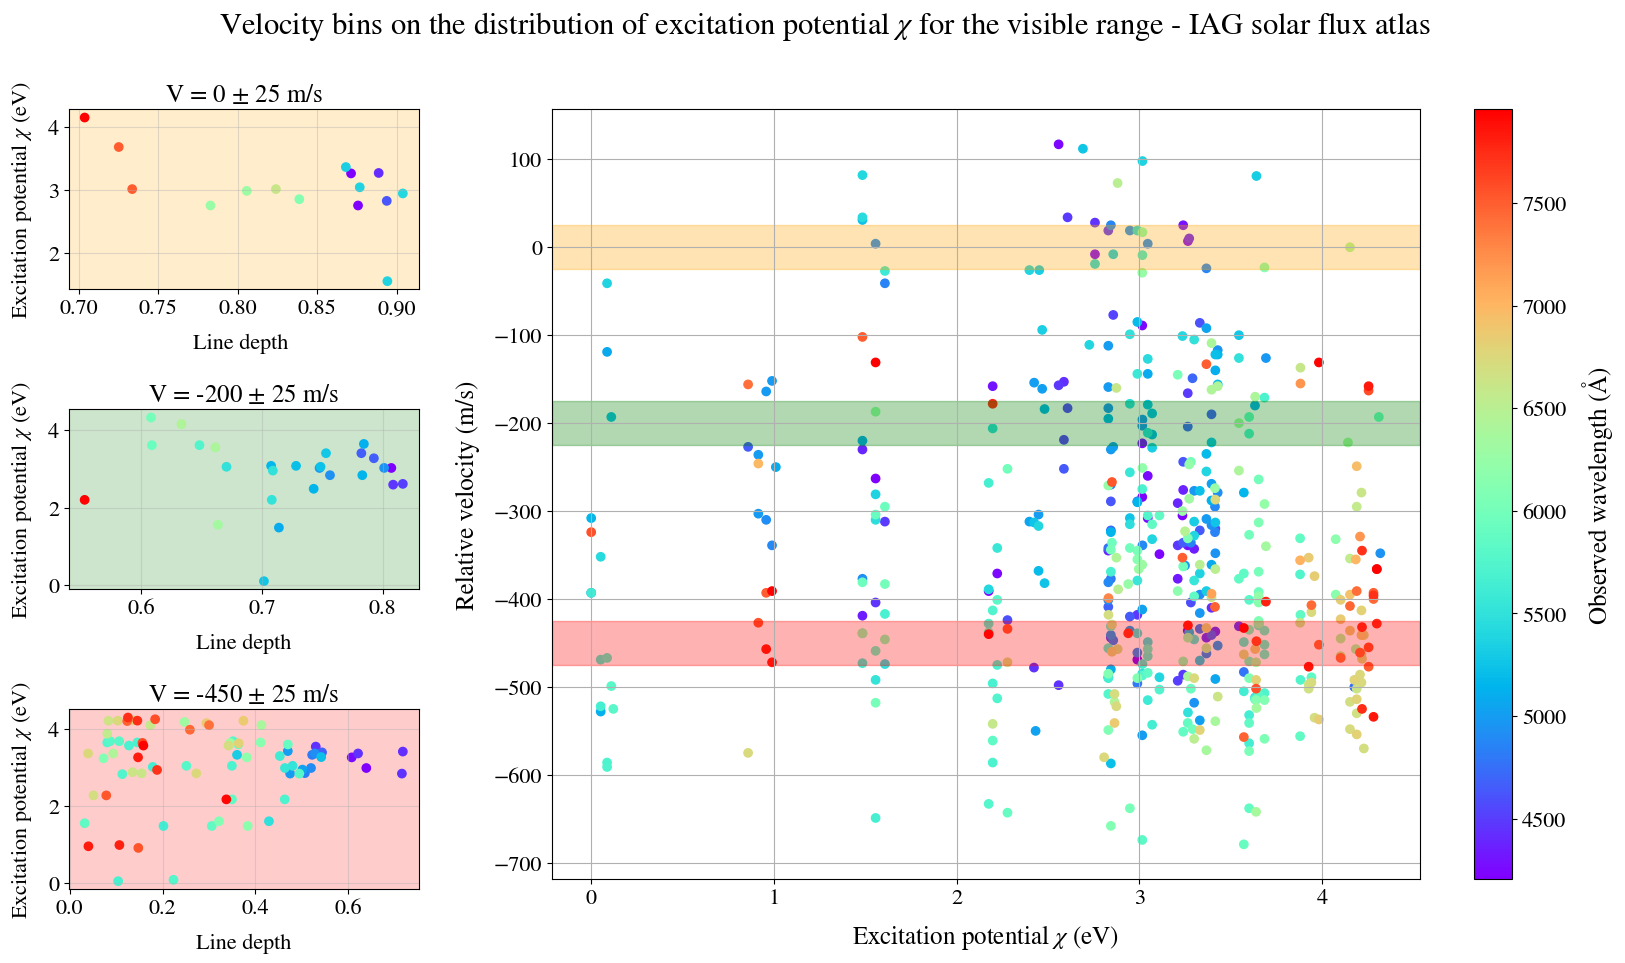

In [11]:
#Another form to graph
# Crear figura principal
fig3, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(Energy_data_VIS['Lower potential'],Energy_data_VIS['Velocity'],c=Energy_data_VIS['Wave A'],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=18)

fig3.suptitle('Velocity bins on the distribution of excitation potential $\chi$ for the visible range - IAG solar flux atlas',fontsize=22,x=0.32, y=0.98)
ax.set_xlabel(r'Excitation potential $\chi$ (eV)',labelpad=10,fontsize=18)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=18)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig3.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig3.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=1
ax_inseti.scatter(velocity_VIS[i]['Line Depth'],velocity_VIS[i]['Lower potential'],c=velocity_VIS[i]["Wave A"],cmap='rainbow')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_inseti.set_xlabel(r'Line depth ',labelpad=10)
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_VIS[j]['Line Depth'],velocity_VIS[j]['Lower potential'],c=velocity_VIS[j]["Wave A"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_insetj.set_xlabel(r'Line depth',labelpad=10)
ax_insetj.grid(alpha=0.4)

k=10
ax_insetk.scatter(velocity_VIS[k]['Line Depth'],velocity_VIS[k]['Lower potential'],c=velocity_VIS[k]["Wave A"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_insetk.set_xlabel(r'Line depth',labelpad=10)
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.2))
ax_insetj.set_facecolor(color=('green', 0.2))
ax_insetk.set_facecolor(color=('red', 0.2))

# fig3.savefig('Velocity bins energy plot_VIS', bbox_inches='tight')

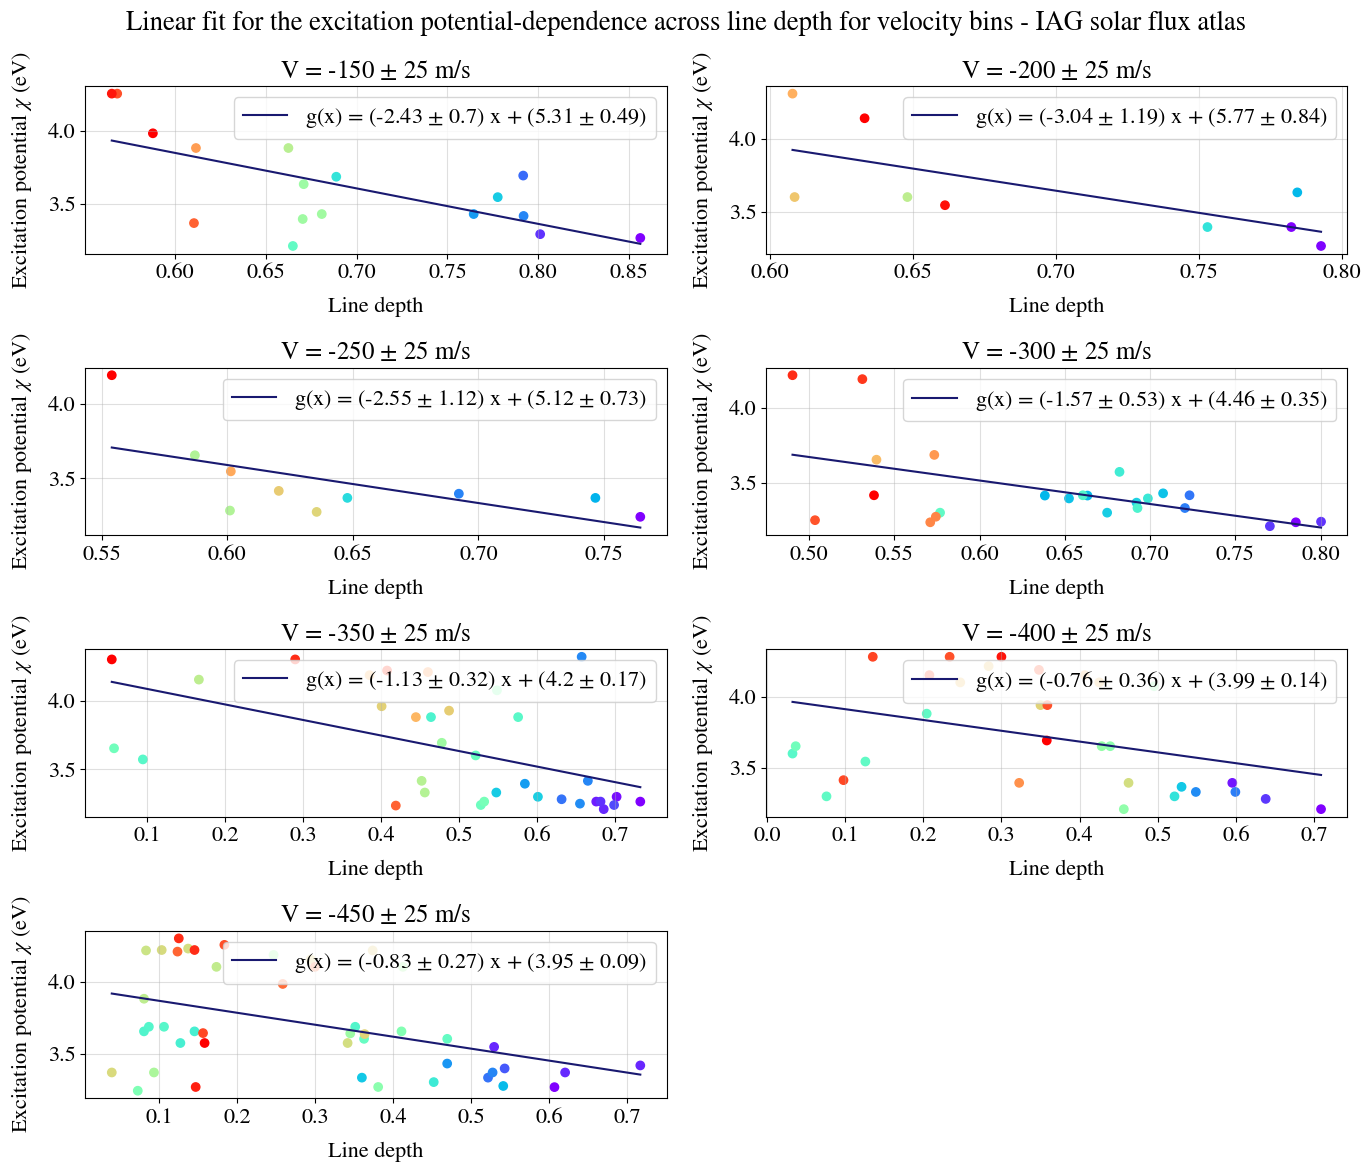

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []

for i in range(4,11):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_VIS[i][velocity_VIS[i]['Lower potential'].between(3.2,5,inclusive='right')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_VIS.append(pd.DataFrame(error))
    fits_VIS.append([values_fit,fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

markers_new = markers[4:11]

#Parameters and their error
param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
param_VIS.columns = ['Slope','Shift']
param_VIS['Error Slope'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[0]
param_VIS['Error Shift'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[1]
param_VIS['Velocity'] = markers_new

fig5, axes = plt.subplots(4, 2, figsize=(14, 12))
fig5.suptitle('Linear fit for the excitation potential-dependence across line depth for velocity bins - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Line Depth'],wave_VIS[i]['Lower potential'],c=wave_VIS[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i],2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i],2)}) x + ({round(param_VIS["Shift"].iloc[i],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth',labelpad=10)
        ax.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins energy VIS')


In [13]:
param_VIS

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-2.432464,5.308633,0.700866,0.488816,-150
1,-3.040424,5.773904,1.191893,0.835362,-200
2,-2.552052,5.119835,1.124517,0.729120,-250
3,-1.566123,4.455080,0.530982,0.345215,-300
4,-1.129873,4.198800,0.324518,0.170278,-350
5,-0.761032,3.990719,0.356205,0.141499,-400
6,-0.832340,3.950200,0.267032,0.091886,-450


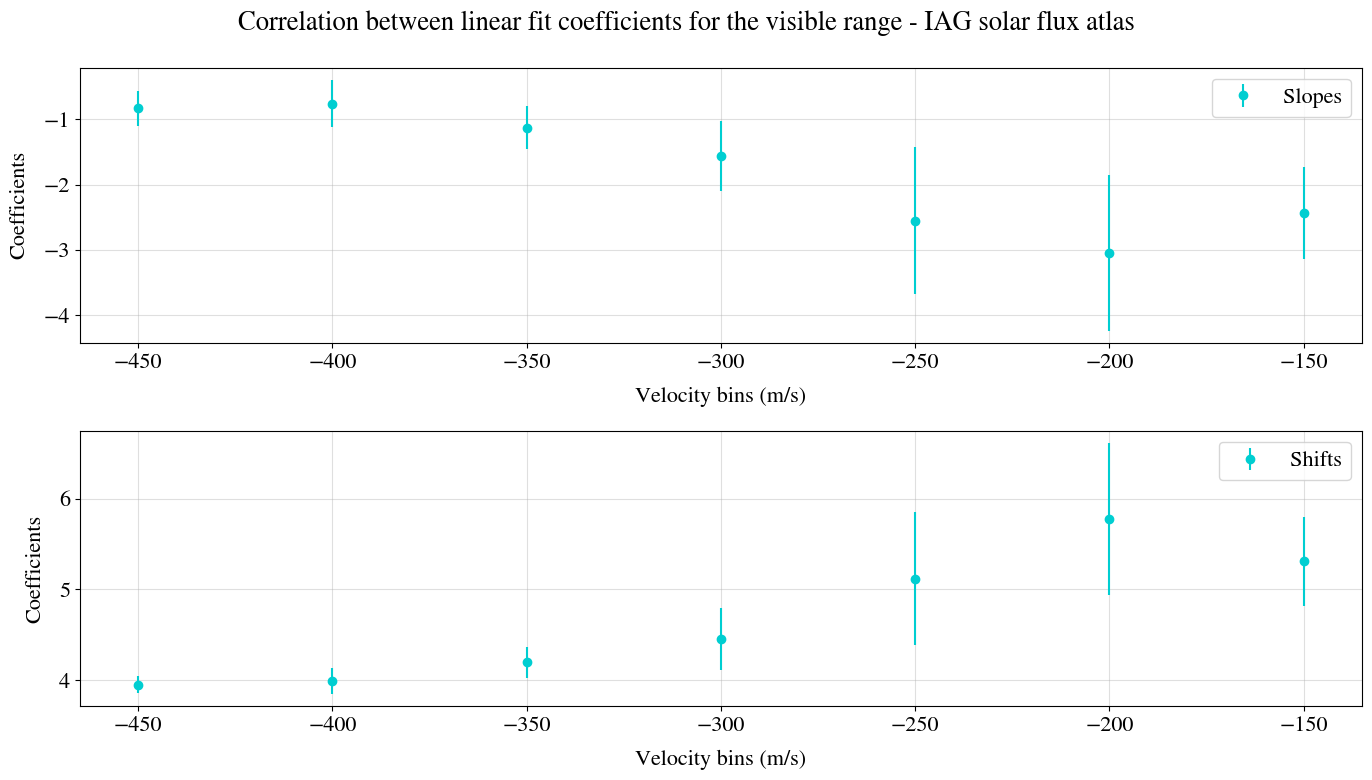

In [ ]:
fig3, axes = plt.subplots(2,1,figsize=(14,8))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_VIS['Velocity'],param_VIS['Slope'],yerr=param_VIS['Error Slope'],fmt='o',c='darkturquoise',label='Slopes')
ax2.errorbar(param_VIS['Velocity'],param_VIS['Shift'],yerr=param_VIS['Error Shift'],fmt='o',c='darkturquoise',label='Shifts')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_VIS['Velocity'],param_VIS['Slope'], 3,cov=True)
values_fit1 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 20)
fit1 = np.polyval(param1,values_fit1)

# ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope = {round(param1[0]*1e7,2)} $\times 10^{{-7}}$ $v^2$ -{round(param1[1]*1e4,2)} $\times 10^{{-4}}$ $v$ - {round(param1[2],2)} ')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_VIS['Velocity'] ,param_VIS['Shift'], 3,cov=True)
values_fit2 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 20)
fit2 = np.polyval(param2,values_fit2)

# ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Slope = -{round(param2[0]*-1e5,2)} $\times 10^{{-5}}$ $v^2$ -{round(param2[1]*-1e3,2)} $\times 10^{{-3}}$ $v$ - {round(param2[2]*-1,2)}')

fig3.suptitle('Correlation between linear fit coefficients for the visible range - IAG solar flux atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('energy coeficients VIS')

## Spatially

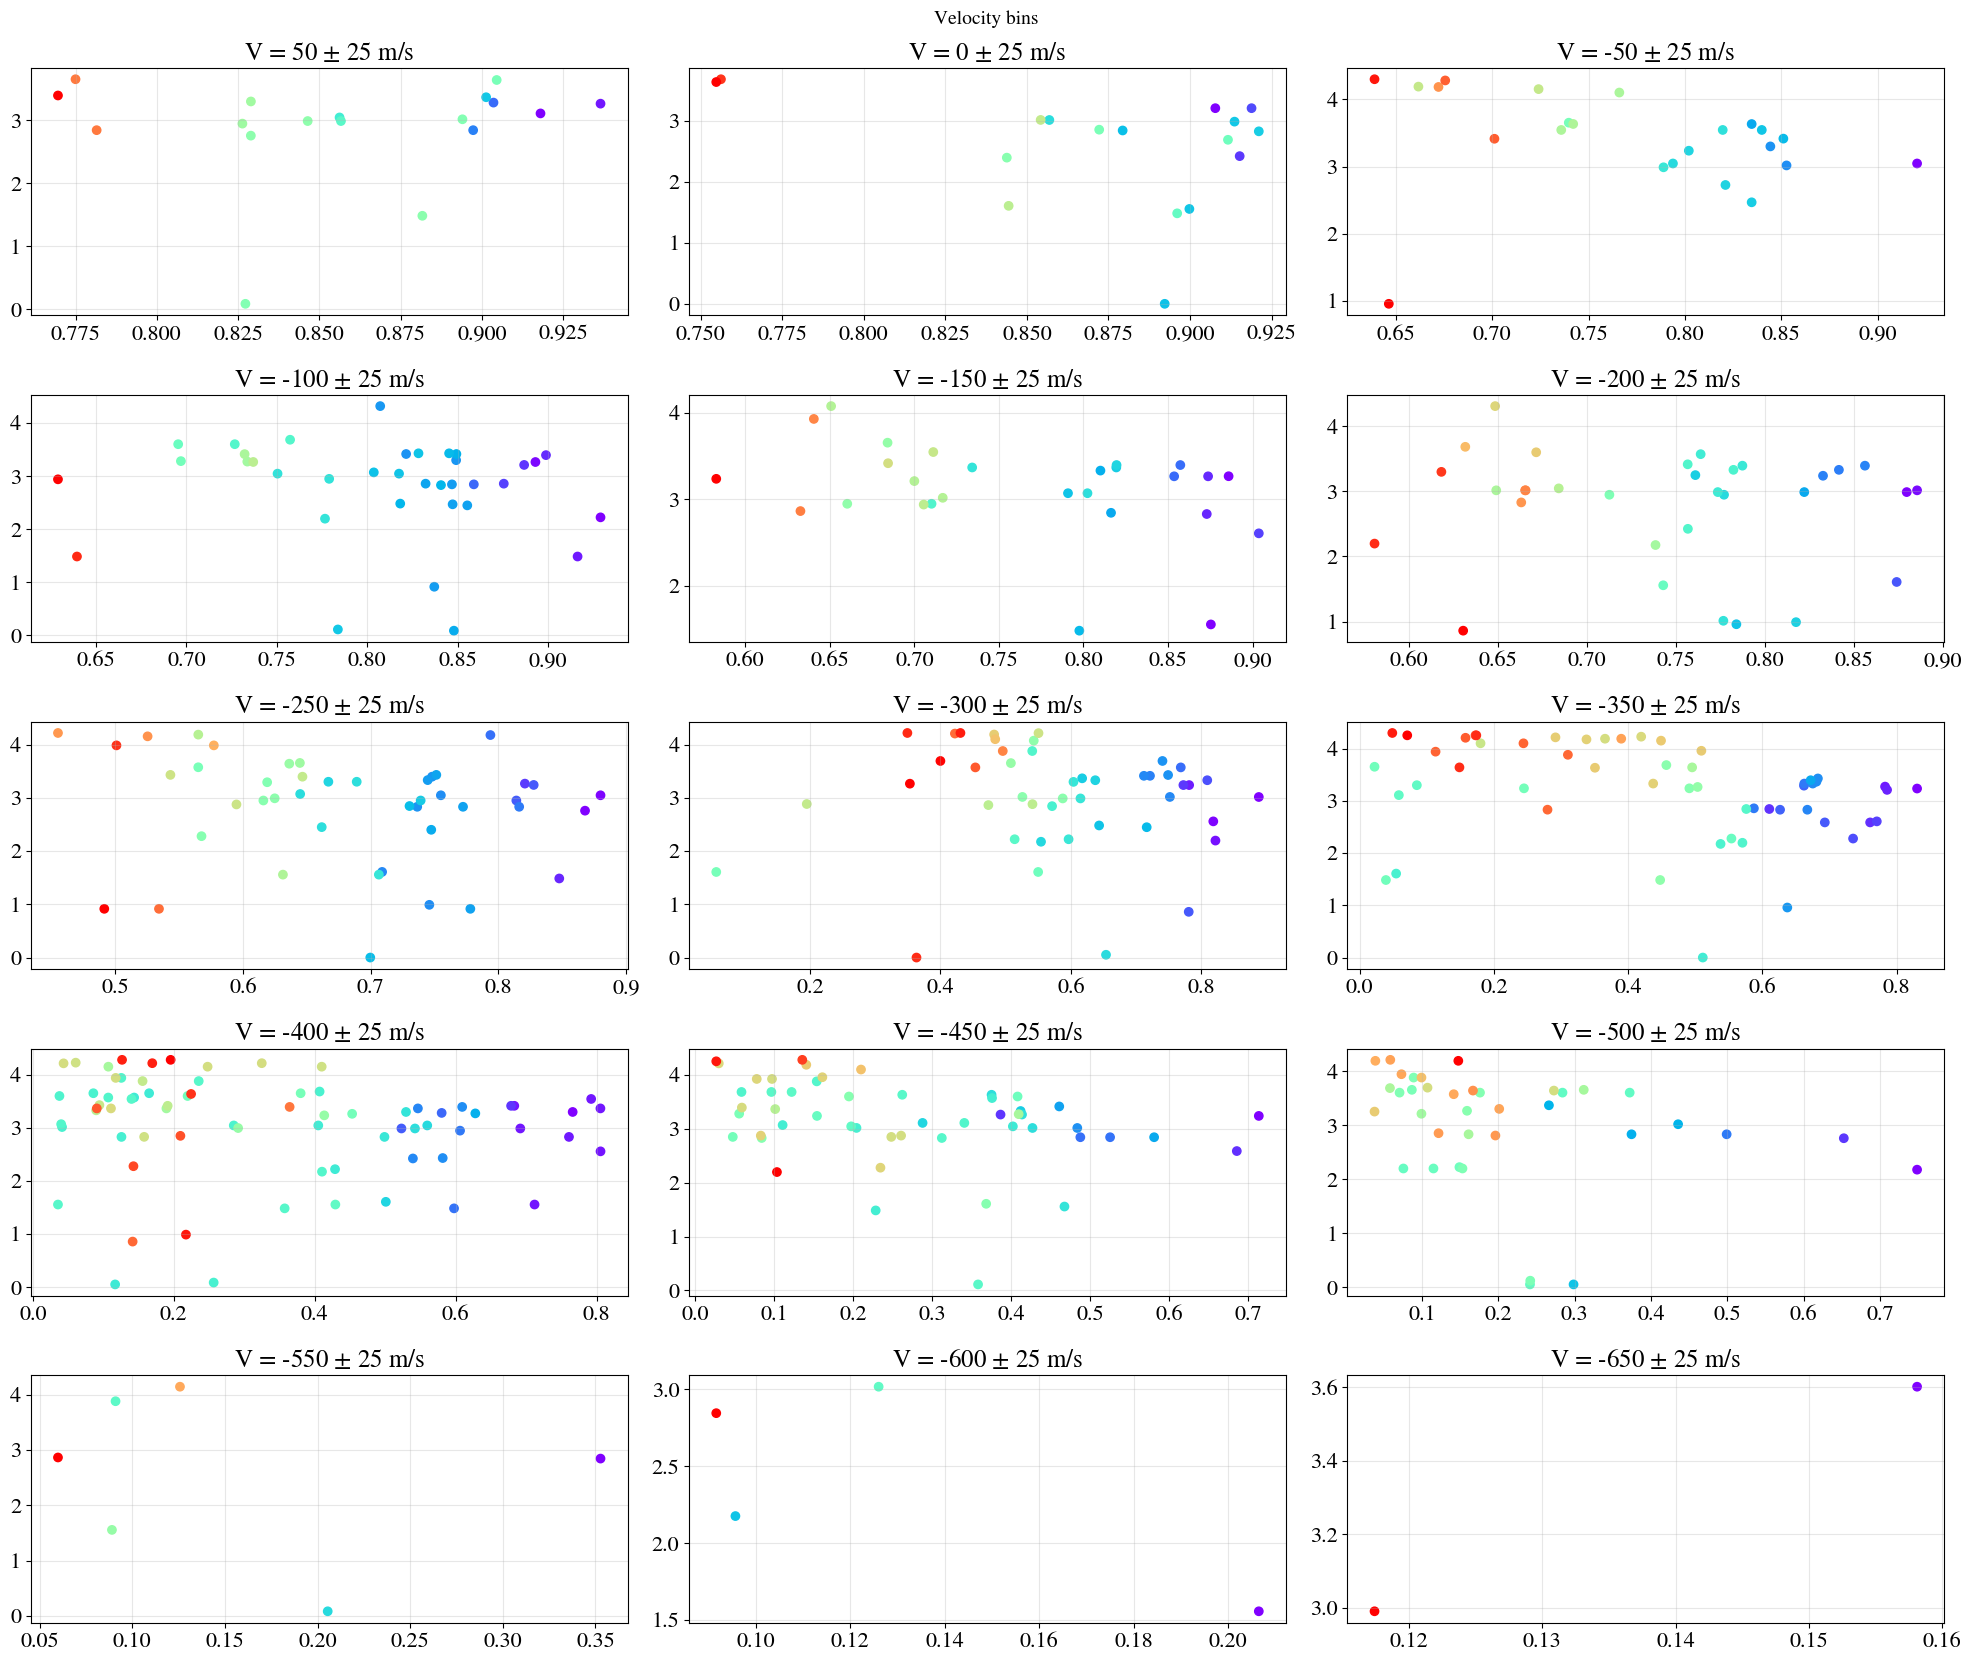

In [15]:
#Organize the dataframe wtih ascending velocities
listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(Energy_data_SPA[Energy_data_SPA['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Line Depth'],velocity_SPA[i]['Lower potential'],c=velocity_SPA[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

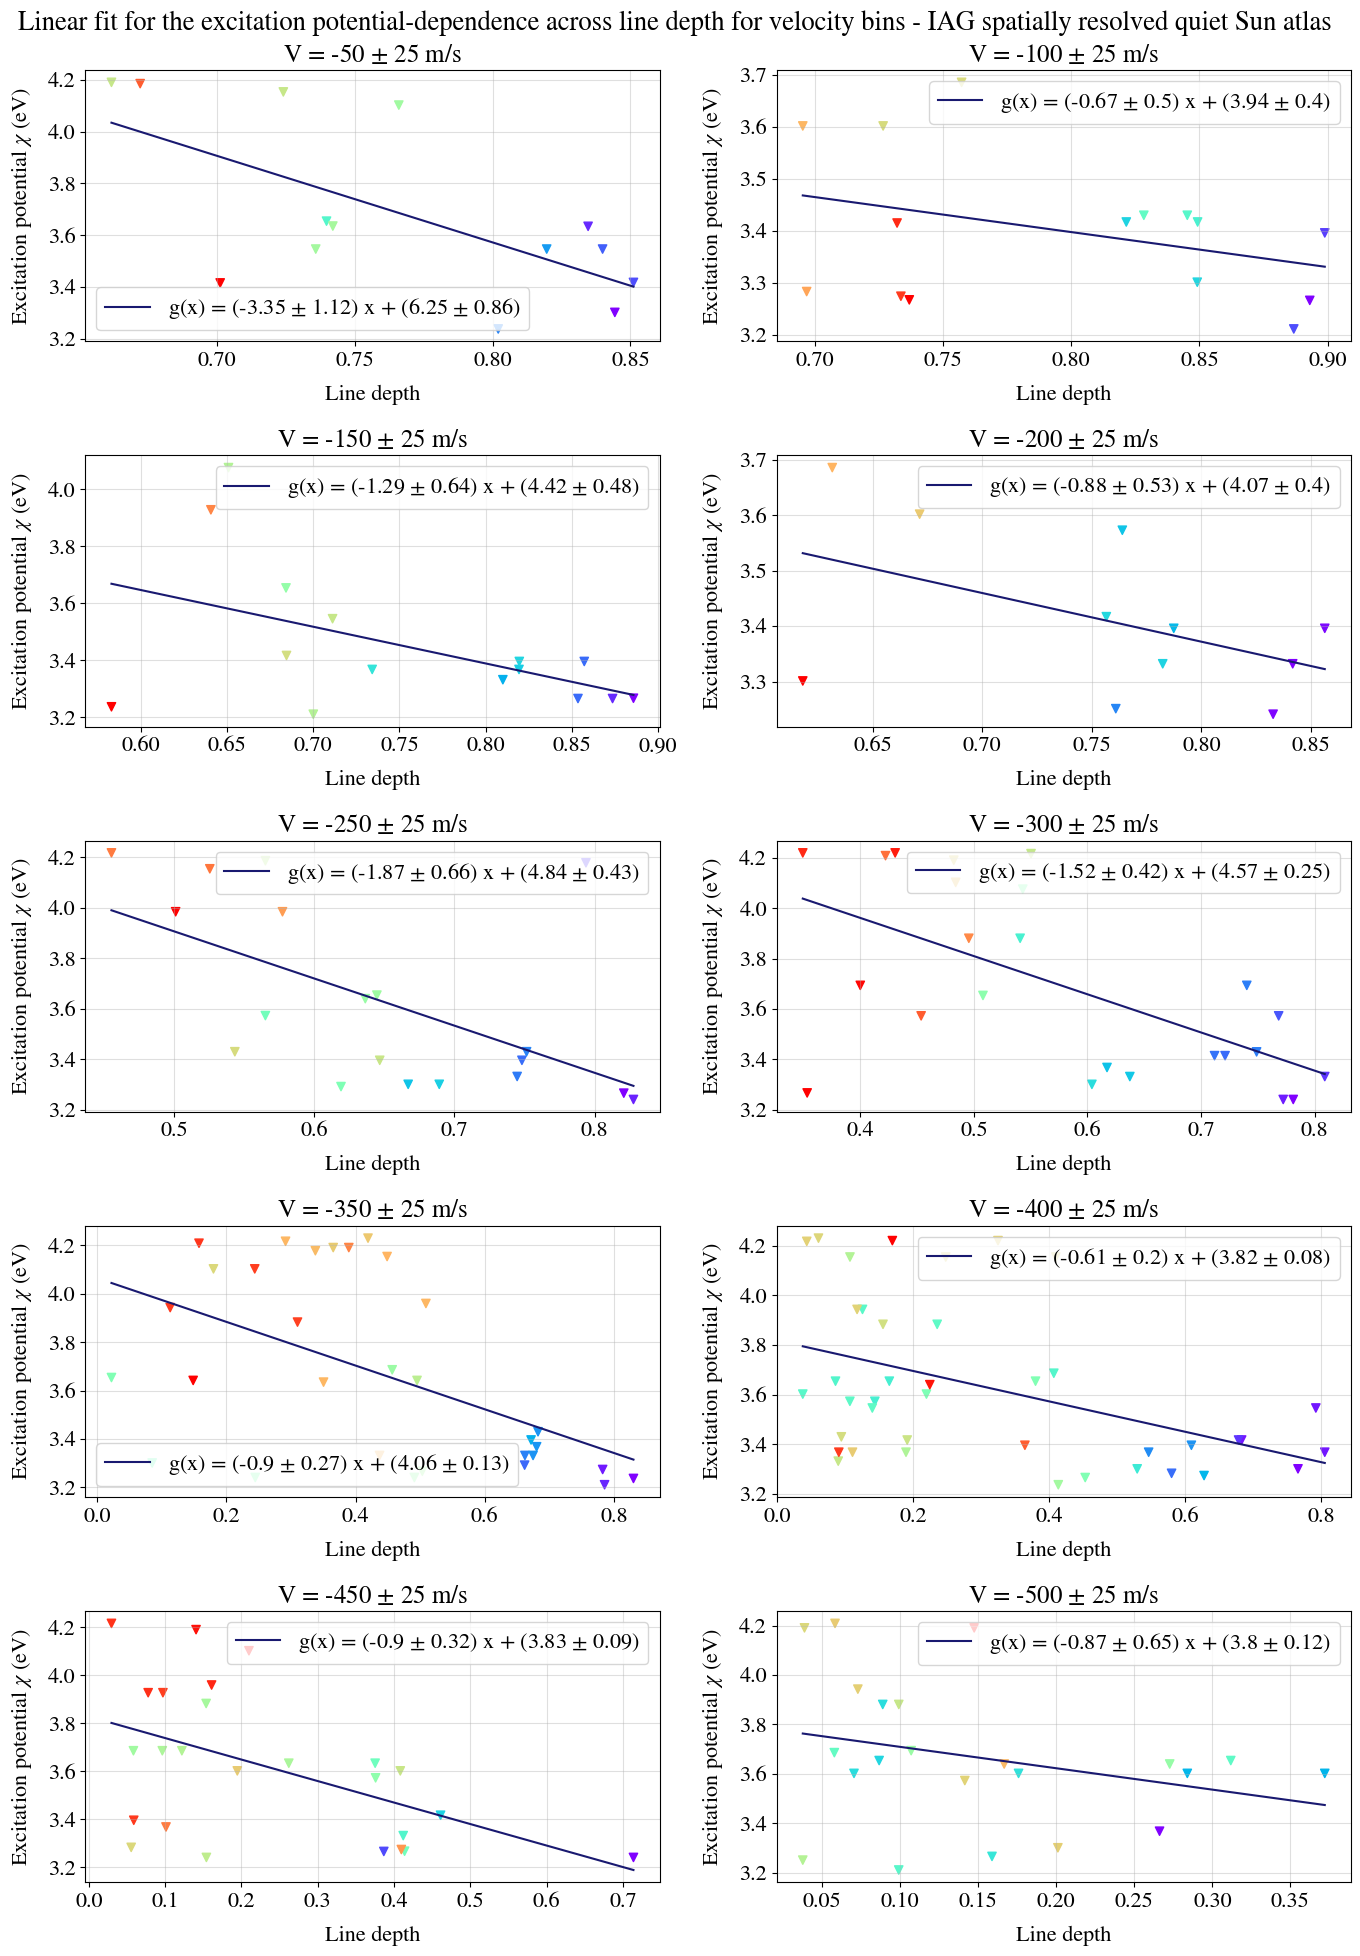

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(2,12):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_SPA[i][velocity_SPA[i]['Lower potential'].between(3.2,4.25,inclusive='right')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_SPA.append(pd.DataFrame(error))
    fits_SPA.append([values_fit,fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

markers_new = markers[2:12]

#Parameters and their error
param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
param_SPA.columns = ['Slope','Shift']
param_SPA['Error Slope'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[0]
param_SPA['Error Shift'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[1]
param_SPA['Velocity'] = markers_new

fig5, axes = plt.subplots(5, 2, figsize=(14, 20))
fig5.suptitle('Linear fit for the excitation potential-dependence across line depth for velocity bins - IAG spatially resolved quiet Sun atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Lower potential'],c=wave_SPA[i]["Wave A"],cmap='rainbow',marker='v')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i],2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i],2)}) x + ({round(param_SPA["Shift"].iloc[i],2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth',labelpad=10)
        ax.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
        ax.grid(alpha=0.4)
        ax.legend()

fig5.tight_layout()


# fig5.savefig('Velocity bins energy SPA')


In [17]:
param_SPA

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-3.348700,6.250705,1.119682,0.861367,-50
1,-0.674765,3.937405,0.496285,0.396973,-100
2,-1.286934,4.418677,0.635220,0.482541,-150
3,-0.878466,4.074604,0.526776,0.399715,-200
4,-1.865325,4.838926,0.655831,0.431144,-250
5,-1.515065,4.567649,0.422135,0.252338,-300
6,-0.902865,4.064629,0.271302,0.131927,-350
7,-0.612145,3.817603,0.198865,0.077496,-400
8,-0.896731,3.828594,0.321651,0.093957,-450
9,-0.865049,3.795872,0.652692,0.115928,-500


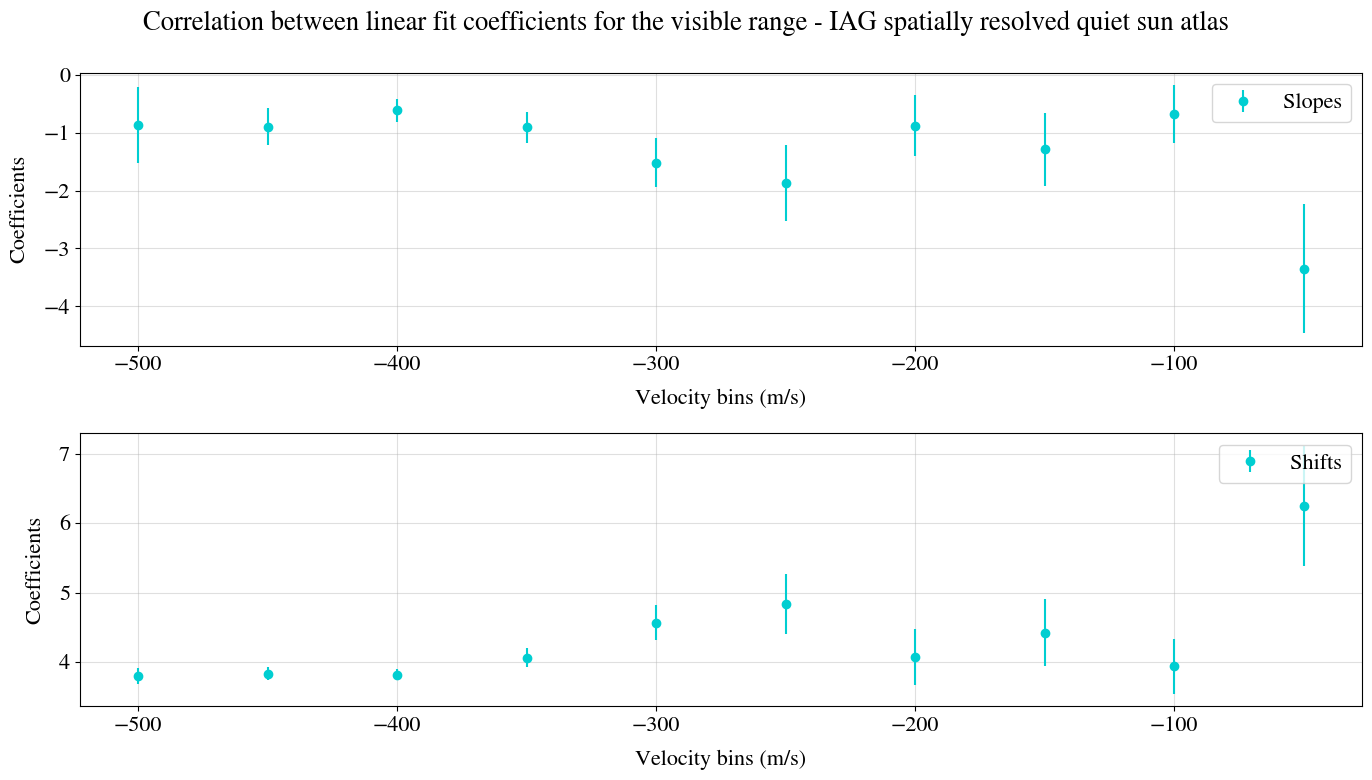

In [ ]:
fig3, axes = plt.subplots(2,1,figsize=(14,8))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_SPA['Velocity'],param_SPA['Slope'],yerr=param_SPA['Error Slope'],fmt='o',c='darkturquoise',label='Slopes')
ax2.errorbar(param_SPA['Velocity'],param_SPA['Shift'],yerr=param_SPA['Error Shift'],fmt='o',c='darkturquoise',label='Shifts')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_SPA['Velocity'],param_SPA['Slope'], 4,cov=True)
values_fit1 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit1 = np.polyval(param1,values_fit1)

# ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope = {round(param1[0]*1e10,2)} $\times 10^{{-10}}$ $v^2$ -{round(param1[1]*1e7,2)} $\times 10^{{-7}}$ $v$ - {round(param1[2]*-1e5,2)} $\times 10^{{-5}}$')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_SPA['Velocity'] ,param_SPA['Shift'], 4,cov=True)
values_fit2 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit2 = np.polyval(param2,values_fit2)

# ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Slope = -{round(param2[0]*-1e6,2)} $\times 10^{{-6}}$ $v^2$ -{round(param2[1]*-1e3,2)} $\times 10^{{-3}}$ $v$ + {round(param2[2],2)}')

fig3.suptitle('Correlation between linear fit coefficients for the visible range - IAG spatially resolved quiet sun atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('energy coeficients SPA')

## NIR

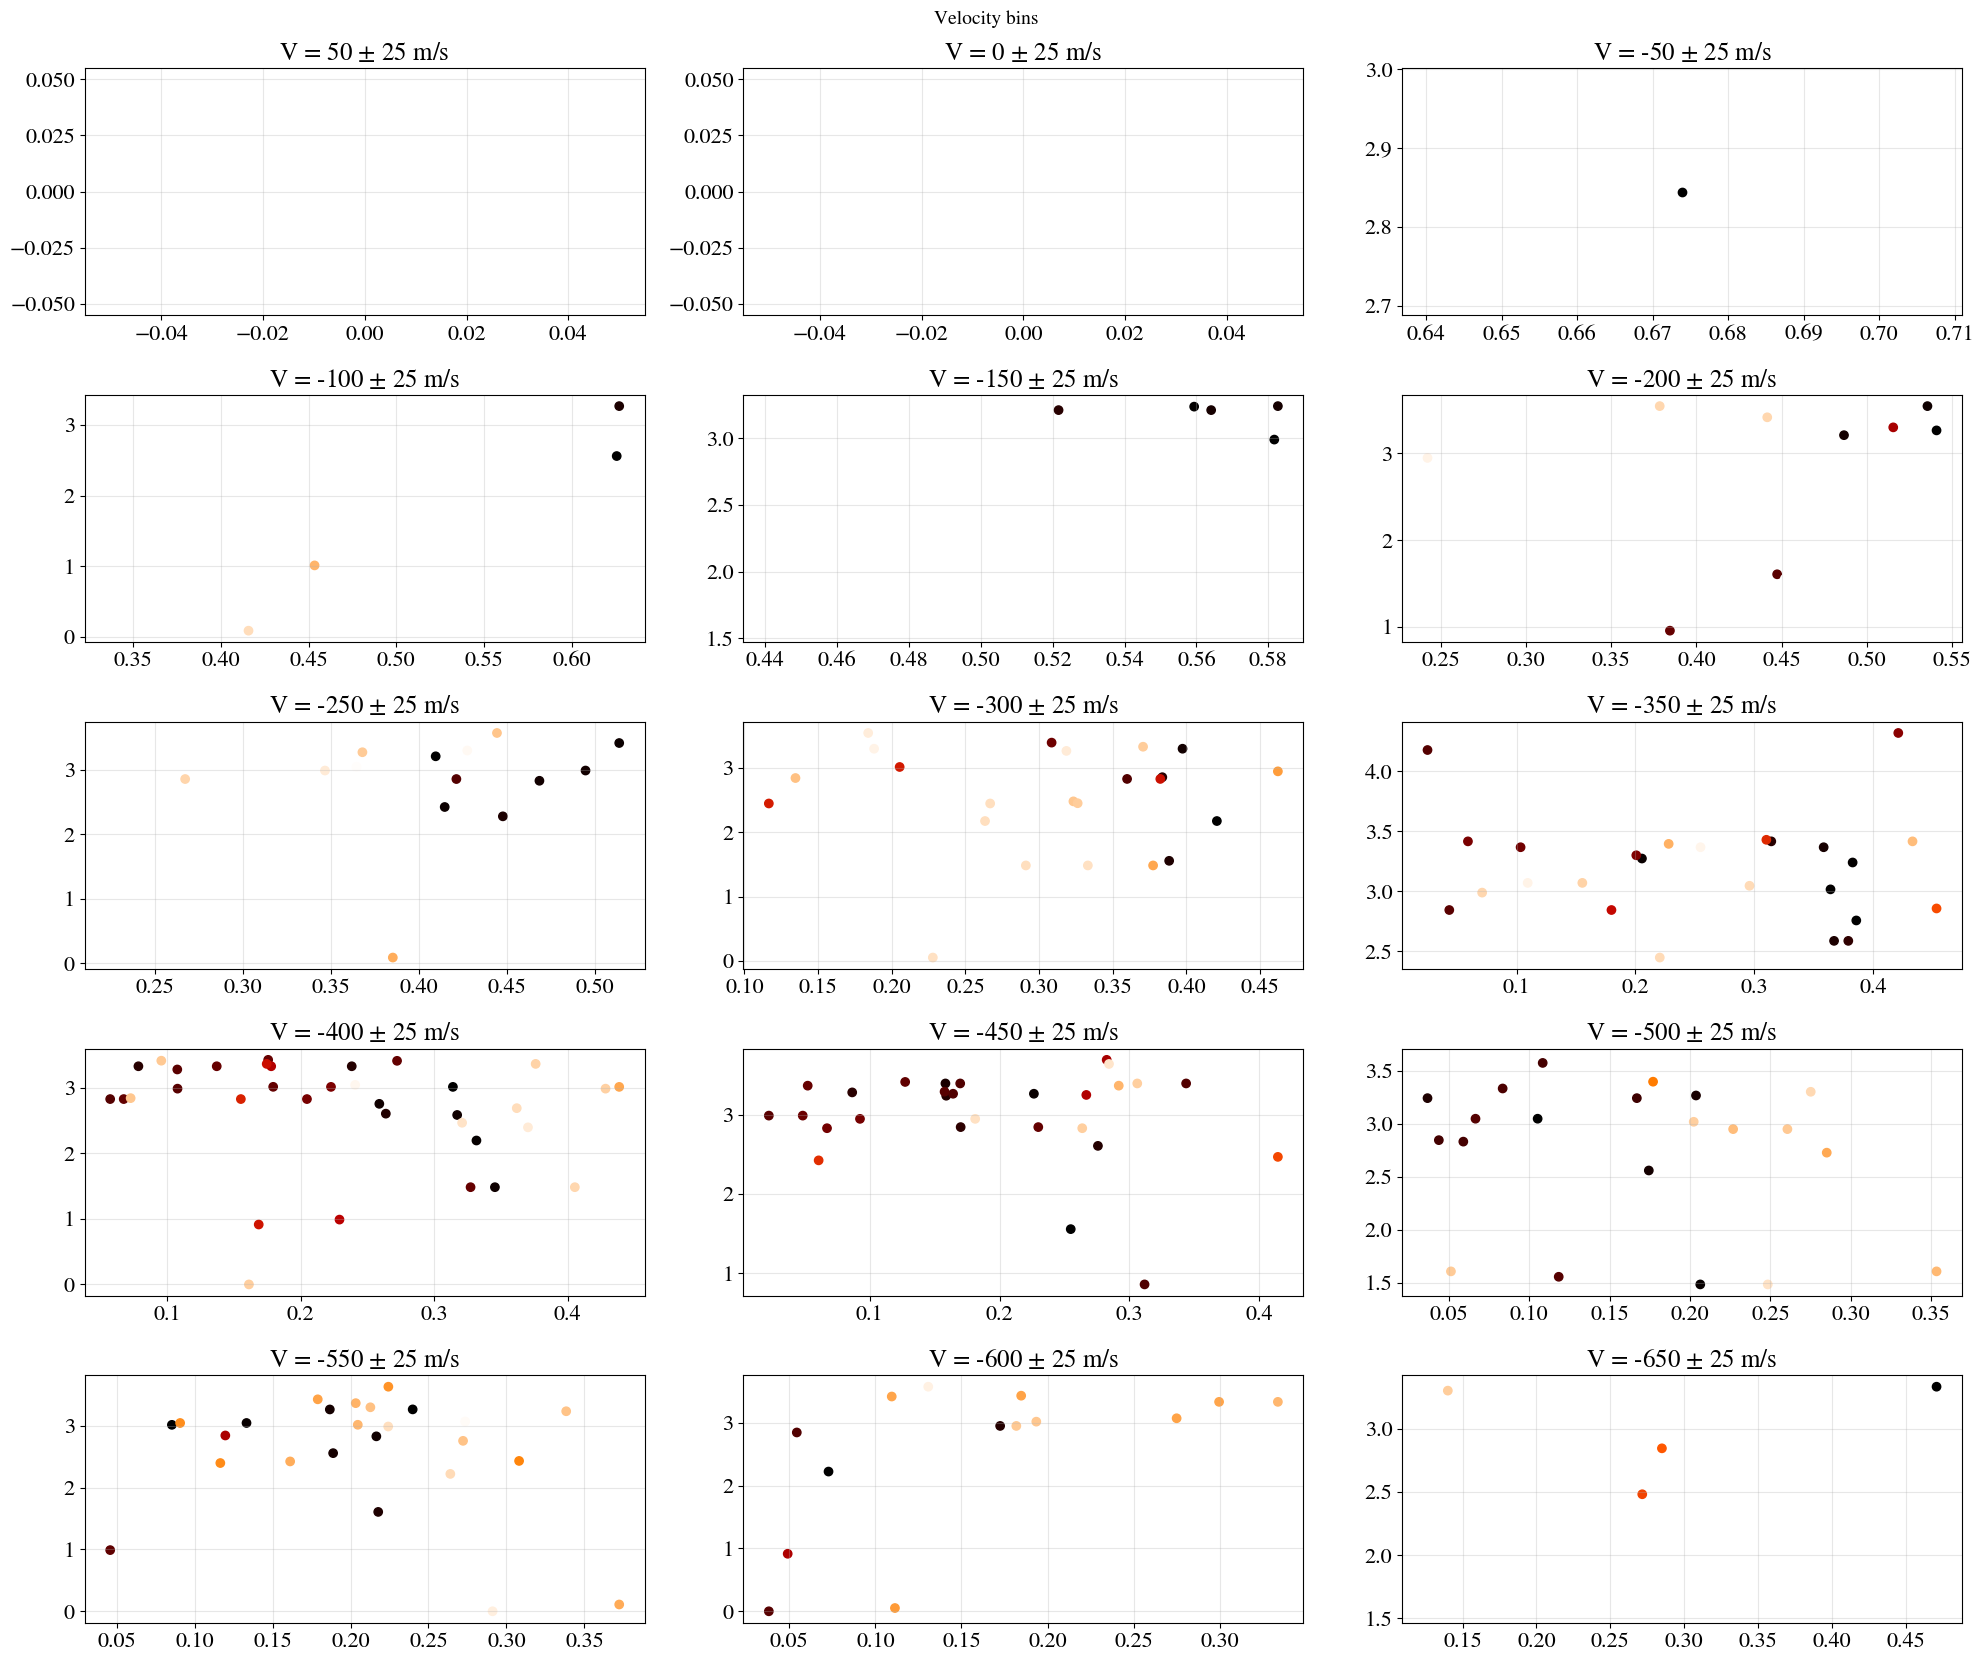

In [19]:
#Organize the dataframe wtih ascending velocities
listed = NIR_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_NIR = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_NIR.append(Energy_data_NIR[Energy_data_NIR['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_NIR[i]['Line Depth'],velocity_NIR[i]['Lower potential'],c=velocity_NIR[i]["Wave A"],cmap='gist_heat')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

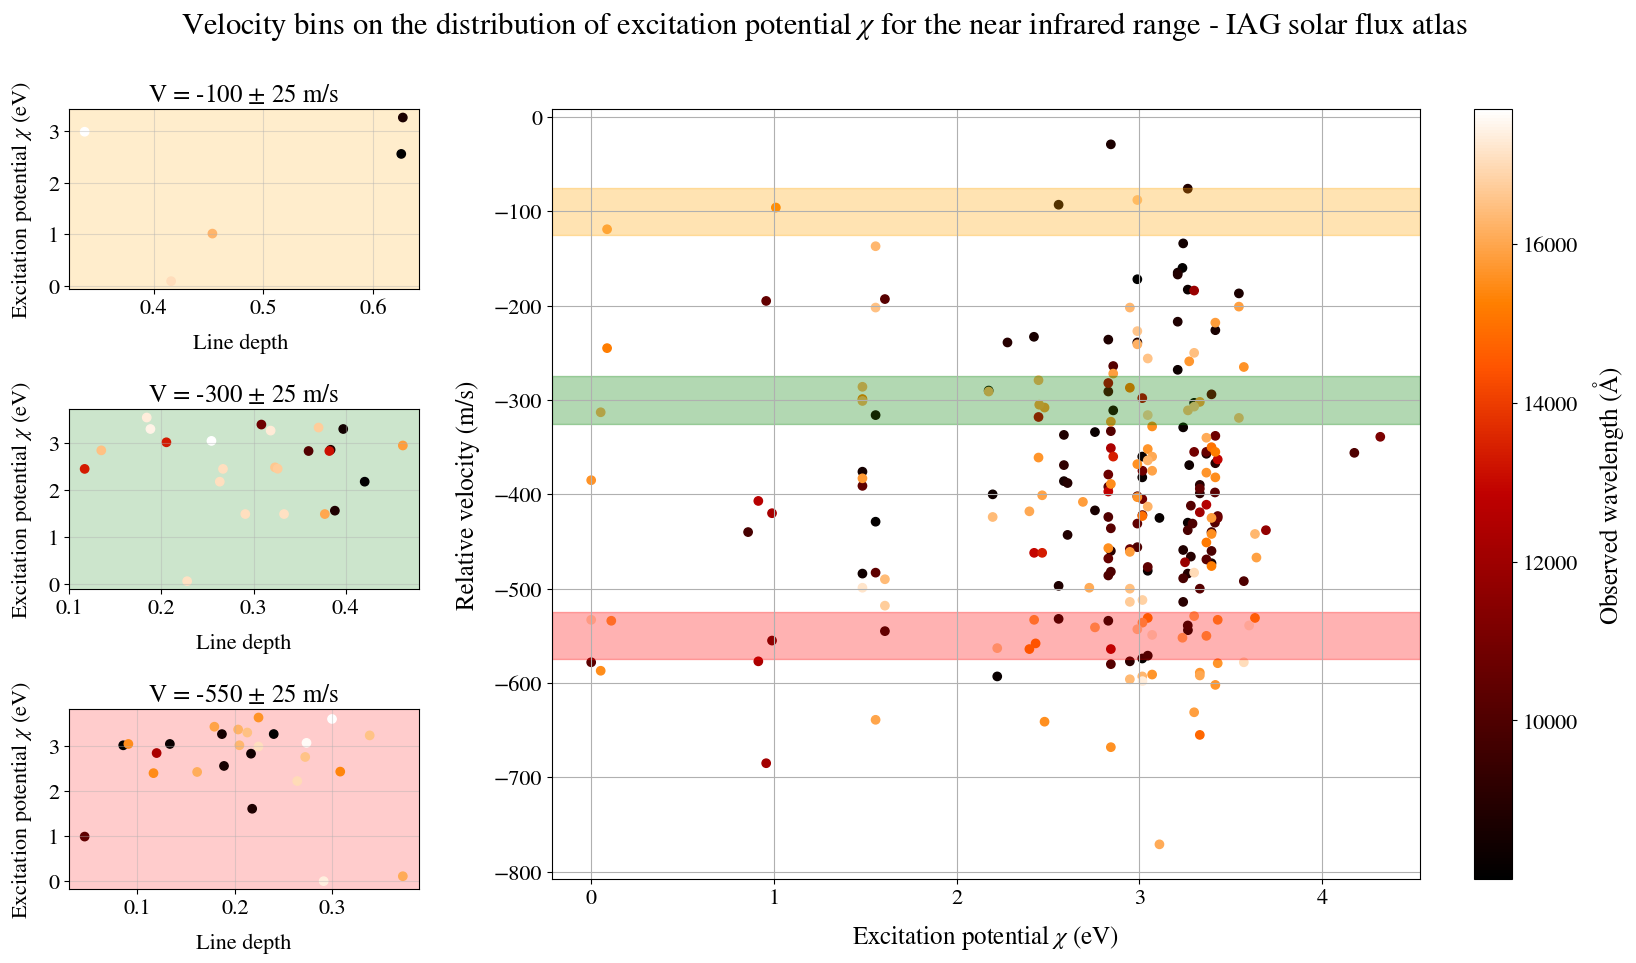

In [20]:
#Another form to graph
# Crear figura principal
fig3, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(Energy_data_NIR['Lower potential'],Energy_data_NIR['Velocity'],c=Energy_data_NIR['Wave A'],cmap='gist_heat',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=18)

fig3.suptitle('Velocity bins on the distribution of excitation potential $\chi$ for the near infrared range - IAG solar flux atlas',fontsize=22,x=0.32, y=0.98)
ax.set_xlabel(r'Excitation potential $\chi$ (eV)',labelpad=10,fontsize=18)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=18)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig3.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig3.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=3
ax_inseti.scatter(velocity_NIR[i]['Line Depth'],velocity_NIR[i]['Lower potential'],c=velocity_NIR[i]["Wave A"],cmap='gist_heat')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_inseti.set_xlabel(r'Line depth ',labelpad=10)
ax_inseti.grid(alpha=0.4)

j=7
ax_insetj.scatter(velocity_NIR[j]['Line Depth'],velocity_NIR[j]['Lower potential'],c=velocity_NIR[j]["Wave A"],cmap='gist_heat')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_insetj.set_xlabel(r'Line depth',labelpad=10)
ax_insetj.grid(alpha=0.4)

k=12
ax_insetk.scatter(velocity_NIR[k]['Line Depth'],velocity_NIR[k]['Lower potential'],c=velocity_NIR[k]["Wave A"],cmap='gist_heat')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
ax_insetk.set_xlabel(r'Line depth',labelpad=10)
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.2))
ax_insetj.set_facecolor(color=('green', 0.2))
ax_insetk.set_facecolor(color=('red', 0.2))

# fig3.savefig('Velocity bins energy plot_NIR', bbox_inches='tight')

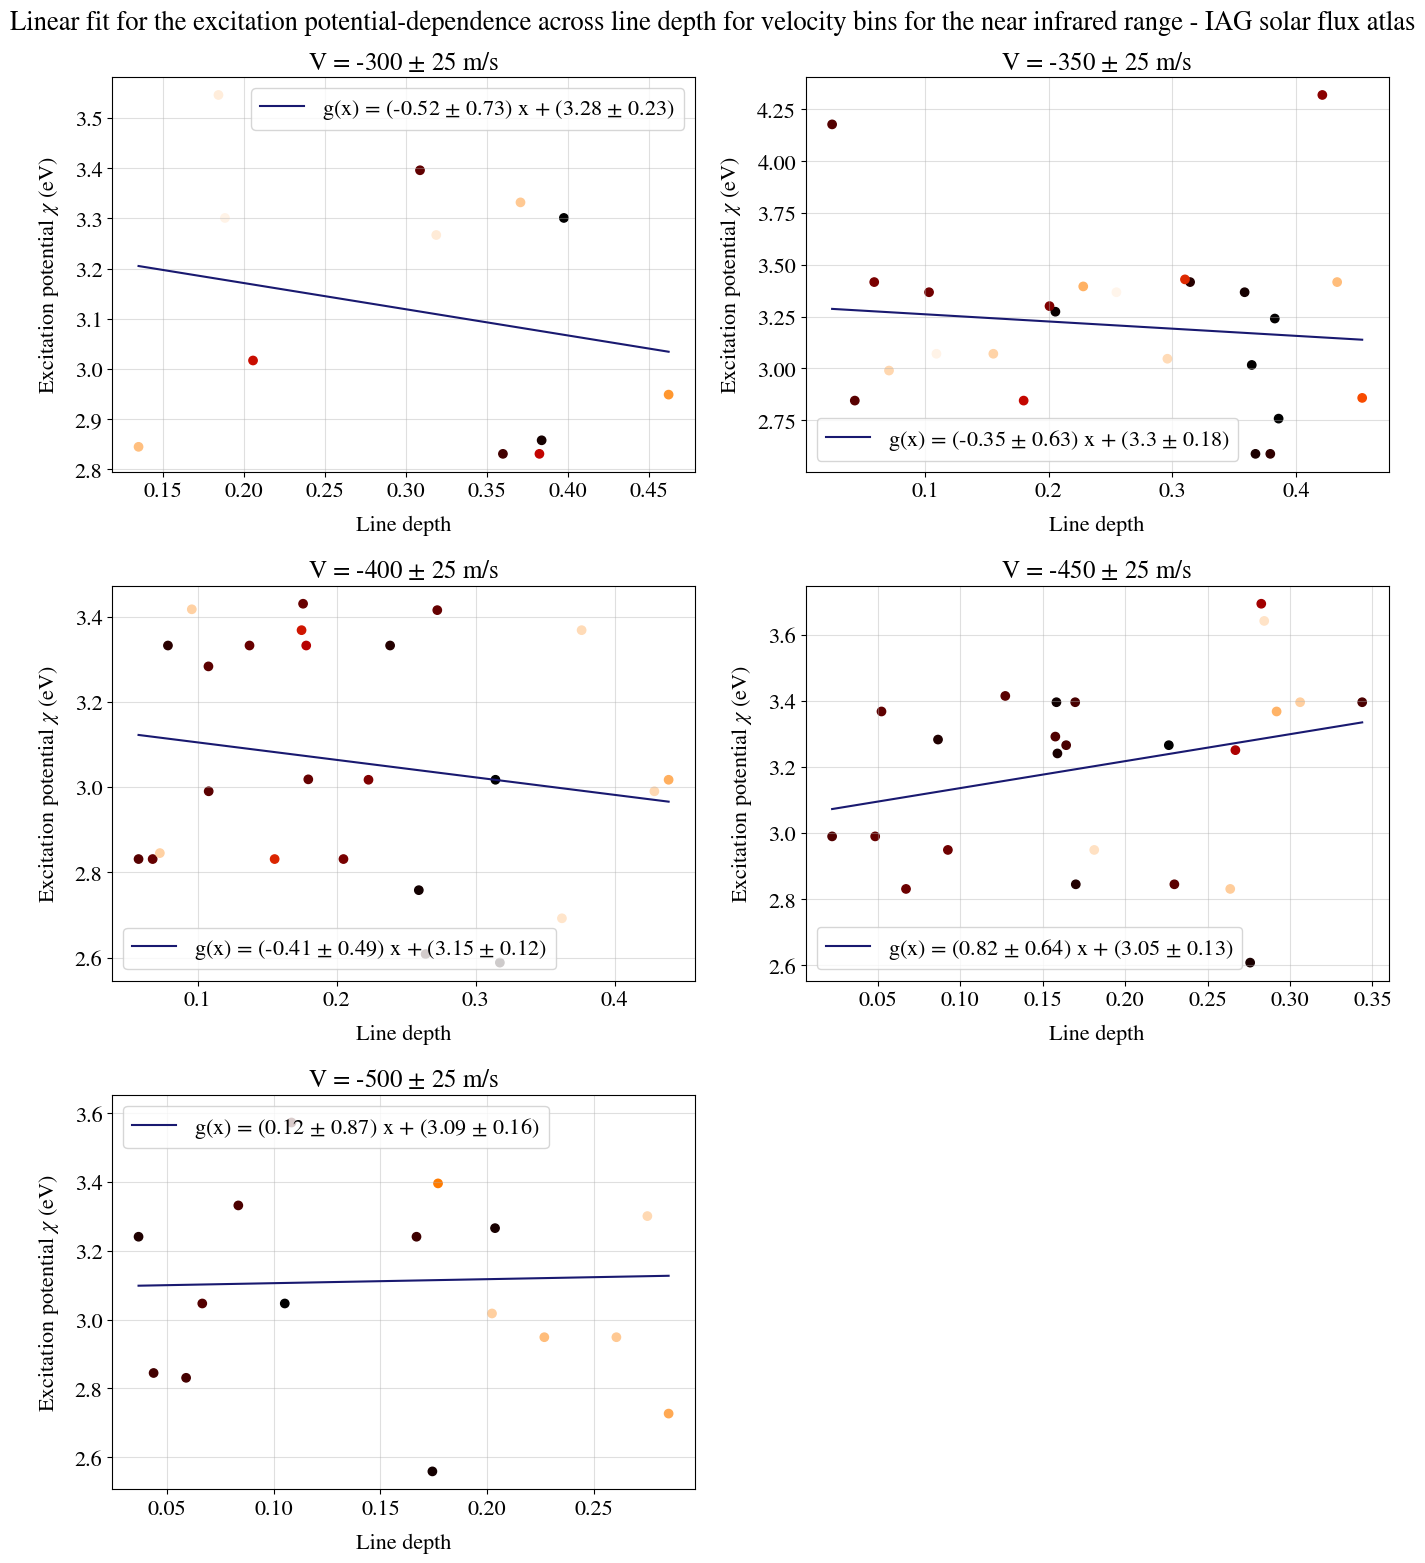

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_NIR = []
values_param_NIR = []
wave_NIR = []
cov_NIR = []

for i in range(7,12):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_NIR[i][velocity_NIR[i]['Lower potential'].between(2.5,5,inclusive='right')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_NIR.append(pd.DataFrame(error))
    fits_NIR.append([values_fit,fit])
    values_param_NIR.append(pd.DataFrame(param))
    wave_NIR.append(new_data)

markers_new = markers[7:12]

#Parameters and their error
param_NIR = pd.concat(values_param_NIR,axis=1).T.reset_index(drop=True)
param_NIR.columns = ['Slope','Shift']
param_NIR['Error Slope'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[0]
param_NIR['Error Shift'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[1]
param_NIR['Velocity'] = markers_new

fig5, axes = plt.subplots(3, 2, figsize=(14, 16))
fig5.suptitle('Linear fit for the excitation potential-dependence across line depth for velocity bins for the near infrared range - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_NIR):
        
        ax.scatter(wave_NIR[i]['Line Depth'],wave_NIR[i]['Lower potential'],c=wave_NIR[i]["Wave A"],cmap='gist_heat')
        ax.plot(fits_NIR[i][0],fits_NIR[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_NIR["Slope"].iloc[i],2)} $\pm$ {round(param_NIR["Error Slope"].iloc[i],2)}) x + ({round(param_NIR["Shift"].iloc[i],2)} $\pm$ {round(param_NIR["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth',labelpad=10)
        ax.set_ylabel(r'Excitation potential $\chi$ (eV)',labelpad=10)
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)
fig5.tight_layout()


# fig5.savefig('Velocity bins energy NIR')


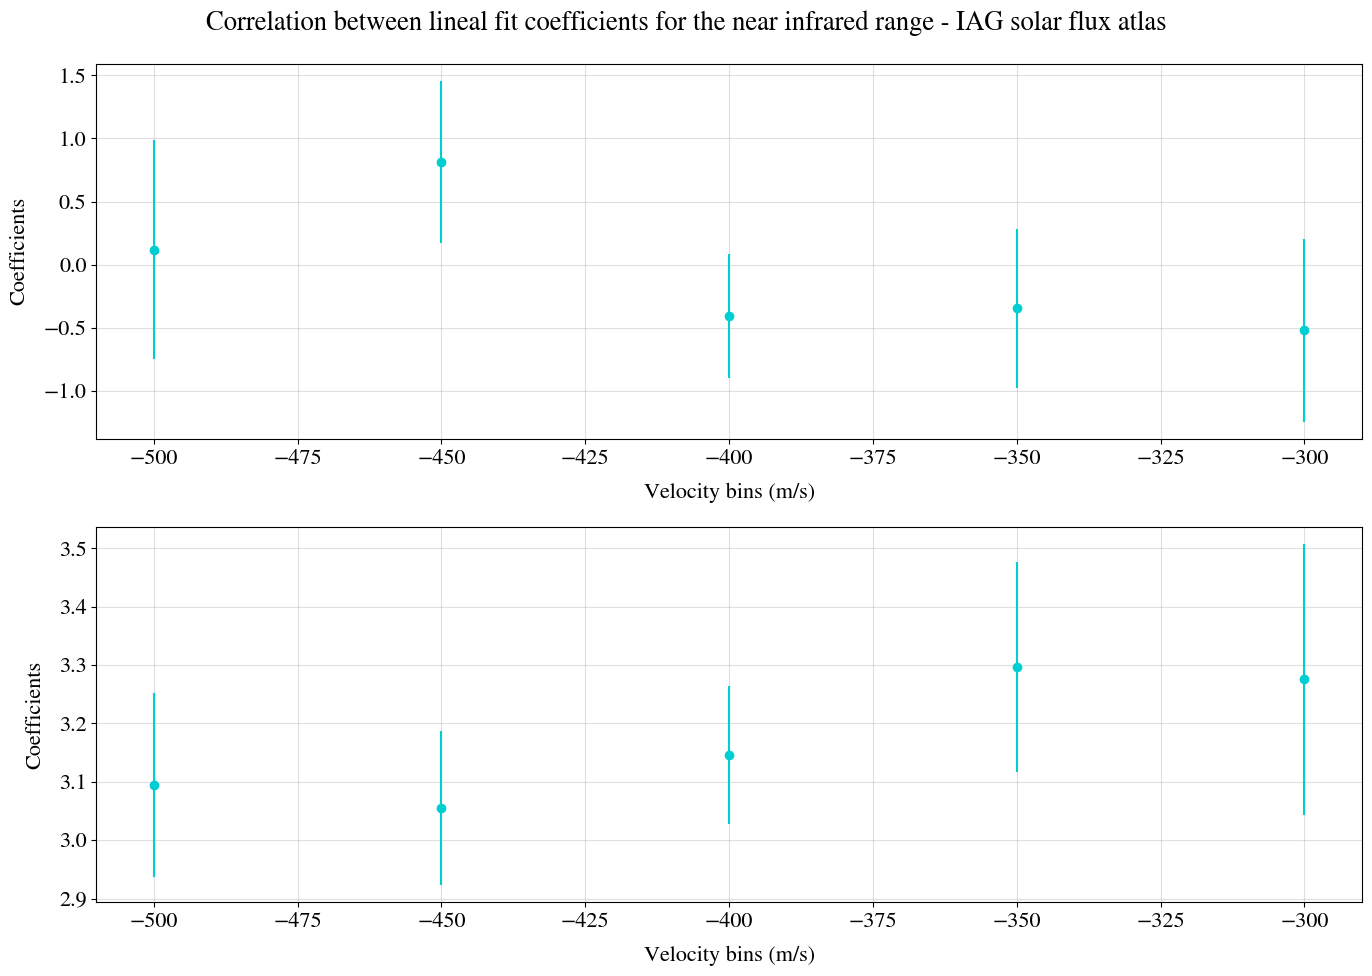

In [22]:
fig3, axes = plt.subplots(2,1,figsize=(14,10))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_NIR['Velocity'],param_NIR['Slope'],yerr=param_NIR['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_NIR['Velocity'],param_NIR['Shift'],yerr=param_NIR['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
# param1, cov1 = np.polyfit(param_SPA['Velocity'],param_SPA['Slope'], 4,cov=True)
# values_fit1 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
# fit1 = np.polyval(param1,values_fit1)

# ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope = {round(param1[0]*1e10,2)} $\times 10^{{-10}}$ $v^2$ -{round(param1[1]*1e7,2)} $\times 10^{{-7}}$ $v$ - {round(param1[2]*-1e5,2)} $\times 10^{{-5}}$')

# Made a polynomial first order fit
# param2, cov2 = np.polyfit(param_SPA['Velocity'] ,param_SPA['Shift'], 4,cov=True)
# values_fit2 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
# fit2 = np.polyval(param2,values_fit2)

# ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Slope = -{round(param2[0]*-1e6,2)} $\times 10^{{-6}}$ $v^2$ -{round(param2[1]*-1e3,2)} $\times 10^{{-3}}$ $v$ + {round(param2[2],2)}')

fig3.suptitle('Correlation between lineal fit coefficients for the near infrared range - IAG solar flux atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
# ax1.legend()
# ax2.legend()
fig3.tight_layout()

# fig3.savefig('energy coeficients NIR')